In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis

#from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [3]:
from sklearn.datasets import fetch_covtype
fetch_covtype().keys()

dict_keys(['data', 'target', 'DESCR'])

In [4]:
data = fetch_covtype()
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df['target'] = data.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [6]:
data.DESCR

".. _covtype_dataset:\n\nForest covertypes\n-----------------\n\nThe samples in this dataset correspond to 30Г—30m patches of forest in the US,\ncollected for the task of predicting each patch's cover type,\ni.e. the dominant species of tree.\nThere are seven covertypes, making this a multiclass classification problem.\nEach sample has 54 features, described on the\n`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.\nSome of the features are boolean indicators,\nwhile others are discrete or continuous measurements.\n\n**Data Set Characteristics:**\n\n    =================   ============\n    Classes                        7\n    Samples total             581012\n    Dimensionality                54\n    Features                     int\n    =================   ============\n\n:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;\nit returns a dictionary-like object\nwith the feature matrix in the ``data`` member\nand the target values in ``tar

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,target
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


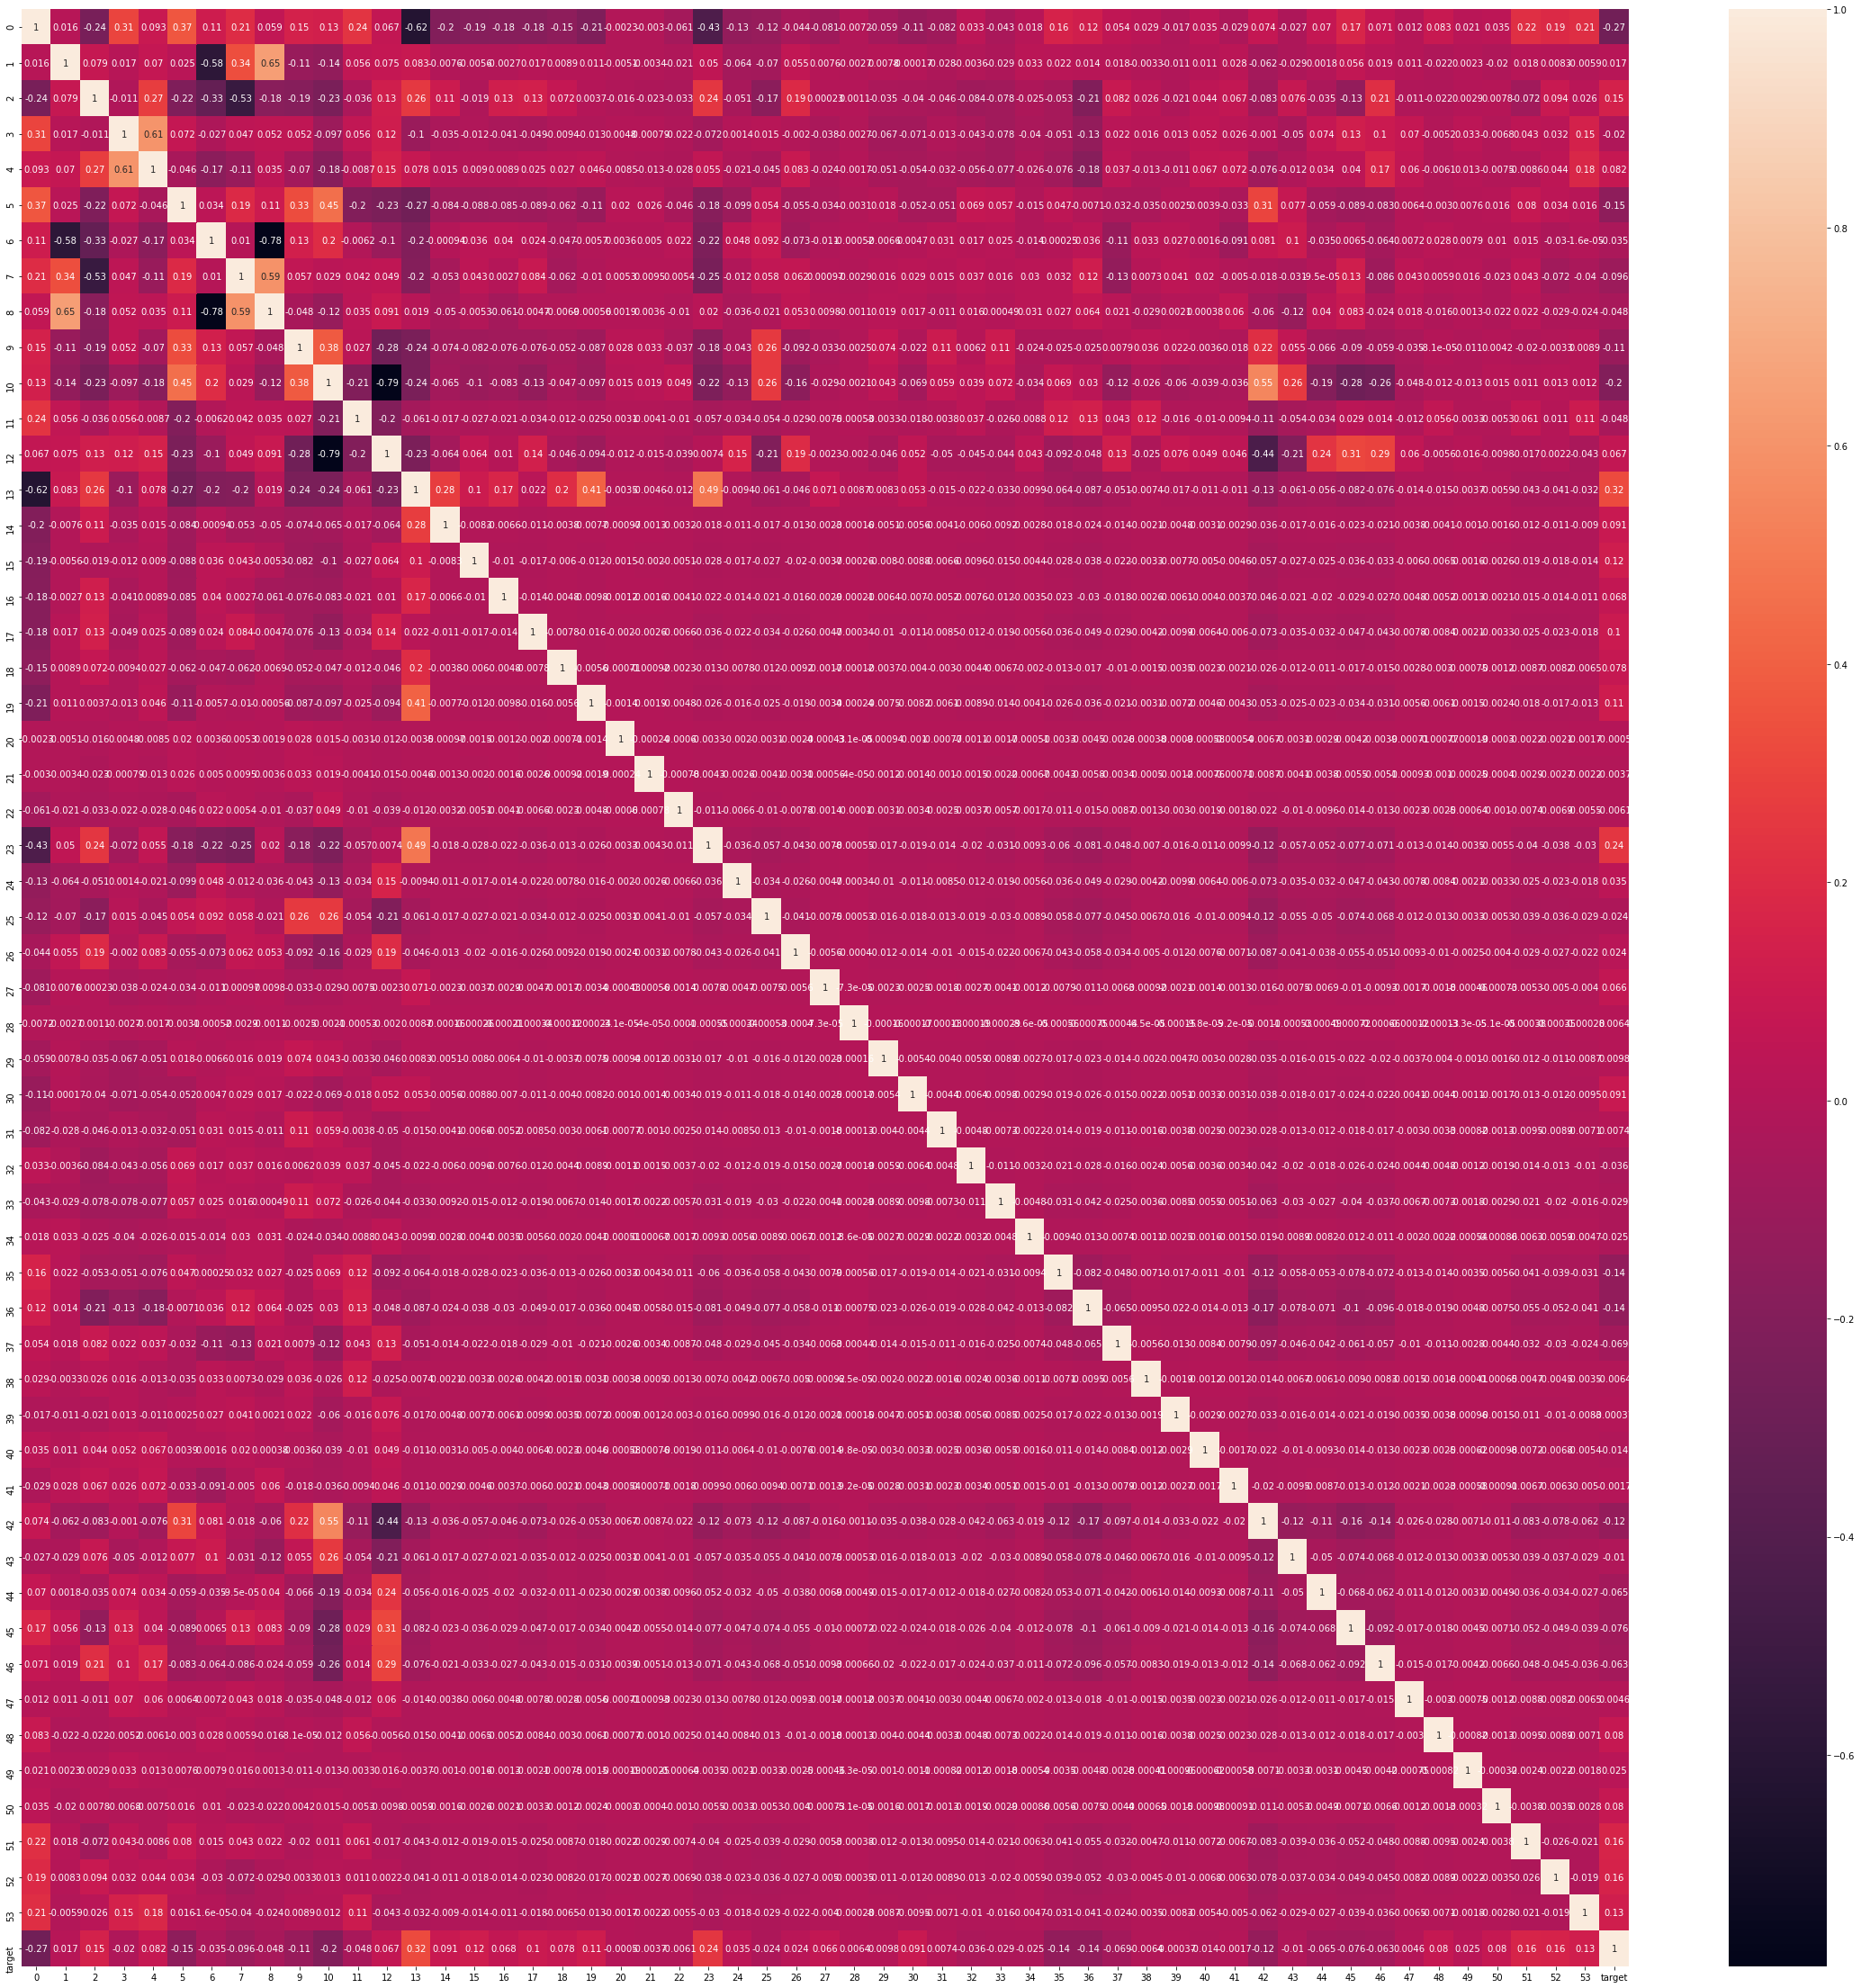

In [47]:
corr = df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr,annot=True)
plt.show()

<AxesSubplot:>

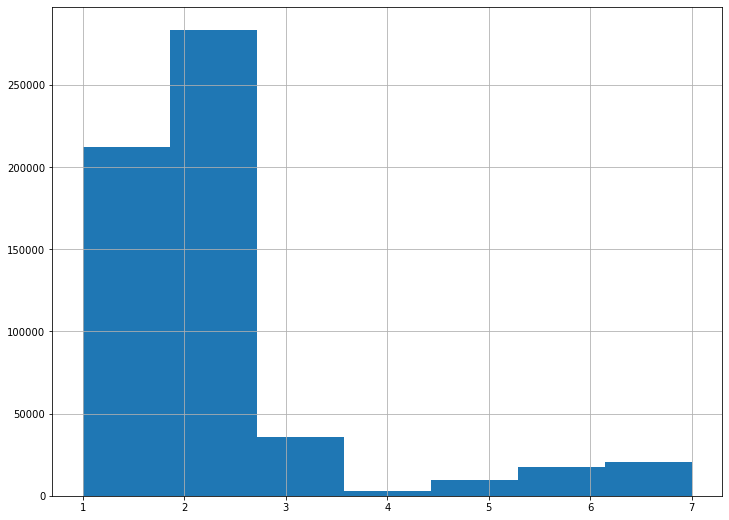

In [9]:
#plt.hist(df['target'])
df['target'].hist(bins=7, figsize=(12,9))

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
costs_mse_train = []
costs_r2_train = []
costs_mse_test = []
costs_r2_test = []
for i in range(1, 53):
    X = df[df.columns[:i]]
    Y = df['target']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    y_train_predict = lin_model.predict(X_train)
    print(i, 'mse_train', np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    print(i, 'r2_train', r2_score(Y_train, y_train_predict))
    costs_r2_train.append(r2_score(Y_train, y_train_predict))
    y_test_predict = lin_model.predict(X_test)
    print(i, 'mse_test', np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    print(i, 'r2_test', r2_score(Y_test, y_test_predict))
    costs_r2_test.append(r2_score(Y_test, y_test_predict))

1 mse_train 1.3446310056987207
1 r2_train 0.07275449453311489
1 mse_test 1.3455362699131734
1 r2_test 0.07227778774463312
2 mse_train 1.3443007242649492
2 r2_train 0.07320995682931608
2 mse_test 1.3452086117728808
2 r2_test 0.07272956110854856
3 mse_train 1.338925558783731
3 r2_train 0.08060665049172866
3 mse_test 1.3411432561953245
3 r2_test 0.07832570112094339
4 mse_train 1.3363430784255343
4 r2_train 0.08414982807343485
4 mse_test 1.338566622504173
4 r2_test 0.0818637806879533
5 mse_train 1.3337365726554418
5 r2_train 0.08771903232627598
5 mse_test 1.3355303839064945
5 r2_test 0.08602422958246703
6 mse_train 1.3323964714649734
6 r2_train 0.08955138009937347
6 mse_test 1.333856286048564
6 r2_test 0.08831414512636959
7 mse_train 1.3310466723099506
7 r2_train 0.0913951260370931
7 mse_test 1.3324591207746754
7 r2_test 0.09022305947320264
8 mse_train 1.3309945422517502
8 r2_train 0.09146629513794524
8 mse_test 1.3324731665656289
8 r2_test 0.09020387899123128
9 mse_train 1.330924611691220

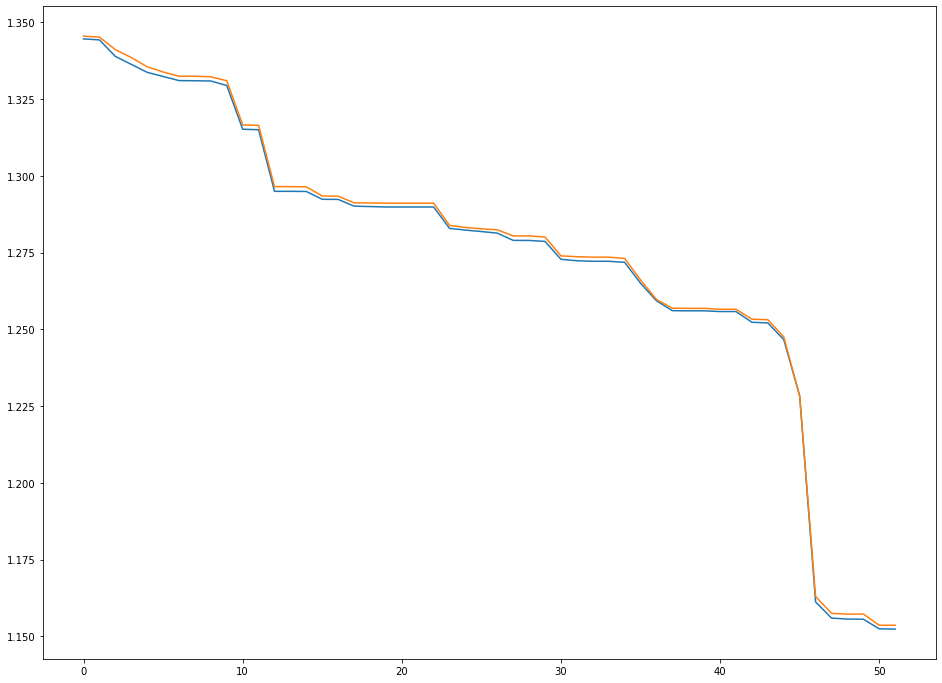

In [12]:
plt.figure(figsize=(16,12))
plt.plot(costs_mse_train)
plt.plot(costs_mse_test)
plt.show()

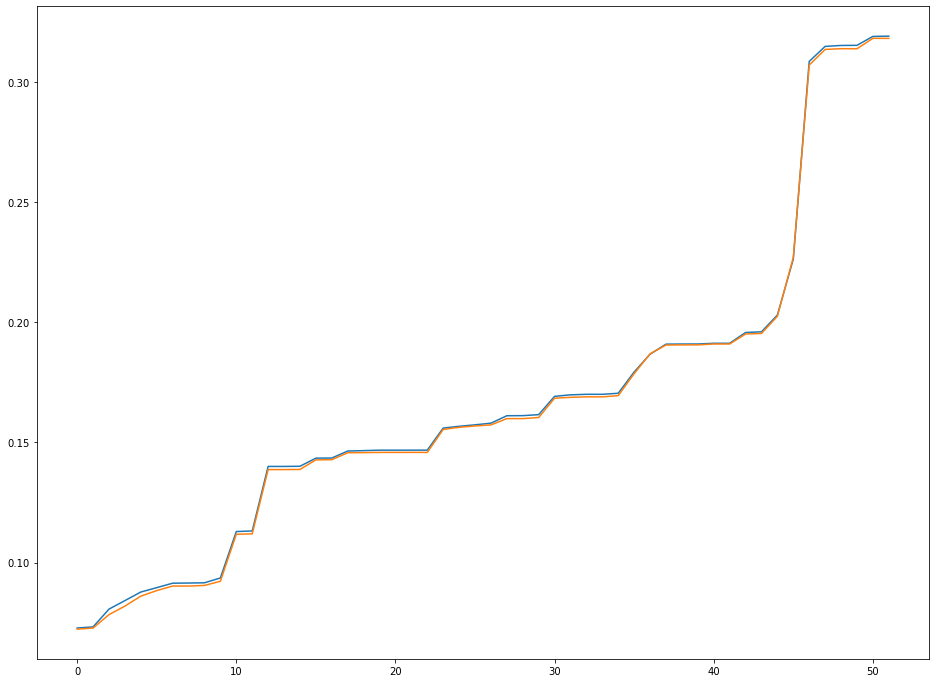

In [13]:
plt.figure(figsize=(16,12))
plt.plot(costs_r2_train)
plt.plot(costs_r2_test)
plt.show()

на основе матрицы корреляции

In [49]:
cols = [0, 2, 5, 9, 10, 13, 15, 17, 19, 23, 35, 36, 42, 51, 52, 53] 
X = df[cols]
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_test_predict = lin_model.predict(X_test)
print(r2_score(Y_test, y_test_predict))

0.2706631794083094


отбор признаков на основе feature_impotance от алгоритма RandomForest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
X = df[df.columns[:-1]]
Y = df['target']

In [18]:
model = RandomForestClassifier()
model.fit(X, Y) # обучение
for i in range(0,53):
    print(f"{i}\t- {model.feature_importances_[i]:.4f}")

0	- 0.2426
1	- 0.0463
2	- 0.0317
3	- 0.0605
4	- 0.0573
5	- 0.1193
6	- 0.0402
7	- 0.0424
8	- 0.0403
9	- 0.1122
10	- 0.0098
11	- 0.0057
12	- 0.0118
13	- 0.0334
14	- 0.0011
15	- 0.0095
16	- 0.0023
17	- 0.0124
18	- 0.0006
19	- 0.0027
20	- 0.0000
21	- 0.0000
22	- 0.0001
23	- 0.0106
24	- 0.0028
25	- 0.0110
26	- 0.0041
27	- 0.0004
28	- 0.0000
29	- 0.0008
30	- 0.0019
31	- 0.0002
32	- 0.0010
33	- 0.0020
34	- 0.0008
35	- 0.0156
36	- 0.0103
37	- 0.0041
38	- 0.0002
39	- 0.0004
40	- 0.0006
41	- 0.0002
42	- 0.0058
43	- 0.0034
44	- 0.0037
45	- 0.0058
46	- 0.0045
47	- 0.0006
48	- 0.0014
49	- 0.0001
50	- 0.0006
51	- 0.0105
52	- 0.0098


жадный отбор признаков по максимальному нарастанию качества модели

In [38]:
greedy_selection = [*range(1,53,1)]
maxim = []
cols = [0] 
X = df[cols]
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_test_predict = lin_model.predict(X_test)
print(r2_score(Y_test, y_test_predict))
maxim.append(0)
maxim.append(r2_score(Y_test, y_test_predict))
while maxim[-1] - maxim[-2] > 0.003:
    r2 = 0
    ind = 0
    for i in greedy_selection:
        cols.append(i)
        X = df[cols]
        Y = df['target']
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
        lin_model = LinearRegression()
        lin_model.fit(X_train, Y_train)
        y_test_predict = lin_model.predict(X_test)
        r2_score(Y_test, y_test_predict)
        if r2 < r2_score(Y_test, y_test_predict):
            r2 = r2_score(Y_test, y_test_predict)
            ind = i
        cols.remove(i)
    maxim.append(r2)
    cols.append(ind)
    greedy_selection.remove(ind)
    print(r2, ind)

0.07227778774463312
0.12433242641491415 51
0.1722763849686466 52
0.1987526677852971 10
0.21284287732817353 13
0.22380178223349356 48
0.23367591174389213 50
0.2380641344568203 4
0.24221605235388055 6
0.2459276005173613 23
0.24947035376501558 30
0.2529564736488118 15
0.2560568275265065 35
0.25889489911786157 17


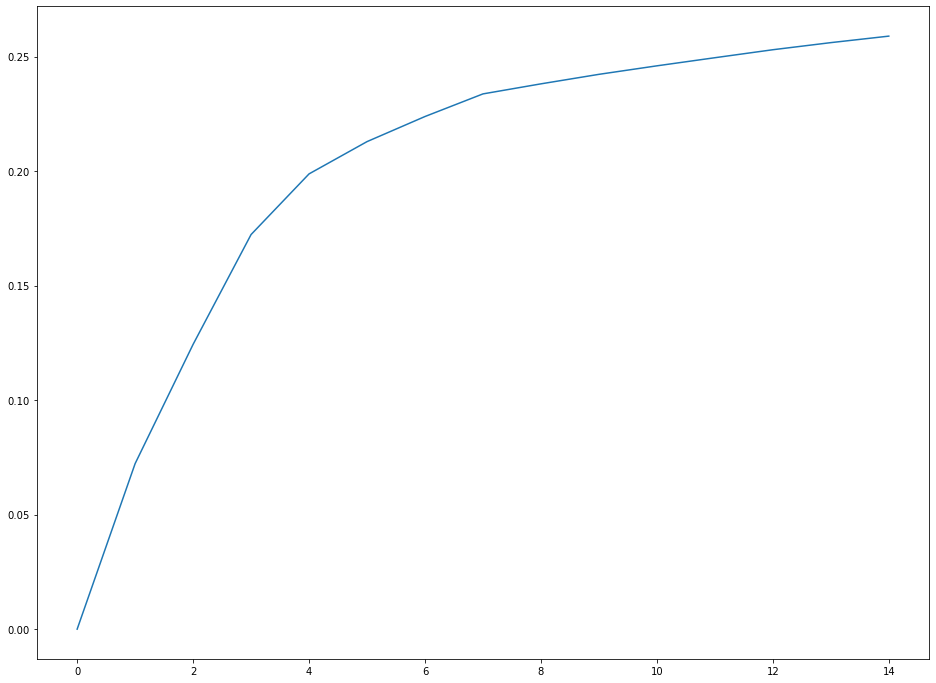

In [39]:
plt.figure(figsize=(16,12))
plt.plot(maxim)
plt.show()

жадное отбрасывание признаков по минимальному падению качества модели

In [41]:
greedy_selection = [*range(1,53,1)]
minim = []
cols = [*range(0,53,1)]
X = df[cols]
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_test_predict = lin_model.predict(X_test)
print(r2_score(Y_test, y_test_predict))
minim.append(0)
minim.append(r2_score(Y_test, y_test_predict))
while minim[-2] - minim[-1] < 0.001:
    r2 = 0
    ind = 0
    for i in greedy_selection:
        cols.remove(i)
        X = df[cols]
        Y = df['target']
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
        lin_model = LinearRegression()
        lin_model.fit(X_train, Y_train)
        y_test_predict = lin_model.predict(X_test)
        r2_score(Y_test, y_test_predict)
        if r2 < r2_score(Y_test, y_test_predict):
            r2 = r2_score(Y_test, y_test_predict)
            ind = i
        cols.append(i)
    minim.append(r2)
    cols.remove(ind)
    greedy_selection.remove(ind)
    print(r2, ind)

0.3184934127539505
0.31854446562175187 49
0.3185612018470998 6
0.3185689154747806 3
0.3185689154747864 11
0.31856891510888297 28
0.3185645010511733 5
0.3184882674147178 48
0.3182491845432276 2
0.31800975107065343 27
0.317716986688936 20
0.3174203279390809 1
0.31710883745598184 51
0.31694624630320967 52
0.3165314977886856 21
0.31594403648393665 9
0.3149398761265505 4


In [45]:
minim.remove(0)

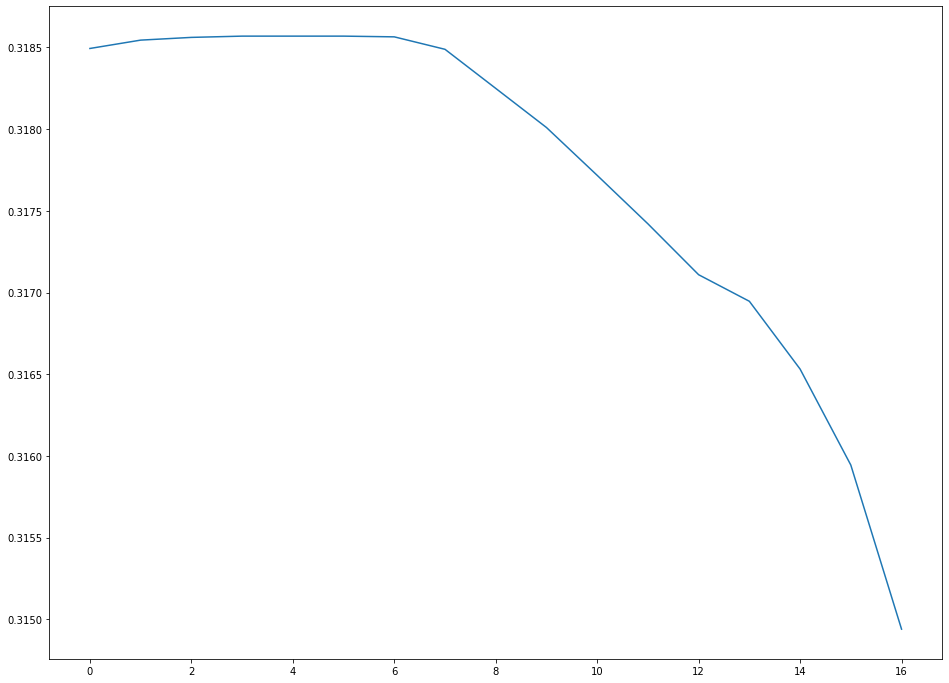

In [46]:
plt.figure(figsize=(16,12))
plt.plot(minim)
plt.show()